<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Part 1: Creating Model**
This goes with lecture "Regression Notebook"

In [ ]:
import tensorflow as tf

In [ ]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get the data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-07-29 20:59:18--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.2’

moore.csv.2         100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-07-29 20:59:18 (26.1 MB/s) - ‘moore.csv.2’ saved [2302/2302]



In [ ]:
!head moore.csv

1971,2300
1972,3500
1973,2500
1973,2500
1974,4100
1974,4500
1974,8000
1975,3510
1976,5000
1976,8500


In [ ]:
# Load in the data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
data

array([[       1971,        2300],
       [       1972,        3500],
       [       1973,        2500],
       [       1973,        2500],
       [       1974,        4100],
       [       1974,        4500],
       [       1974,        8000],
       [       1975,        3510],
       [       1976,        5000],
       [       1976,        8500],
       [       1976,        6500],
       [       1978,        9000],
       [       1978,       29000],
       [       1979,       17500],
       [       1979,       29000],
       [       1979,       68000],
       [       1981,       11500],
       [       1982,       55000],
       [       1982,      134000],
       [       1983,       22000],
       [       1984,       63000],
       [       1984,      190000],
       [       1985,      275000],
       [       1985,       25000],
       [       1985,       16000],
       [       1986,      110000],
       [       1986,      375000],
       [       1986,       30000],
       [       1987,

In [ ]:
# Split up inputs (X) and targets (Y)

X = data[:,0].reshape(-1, 1) # making an N x D matrix (hence X is 2D)
Y = data[:,1]

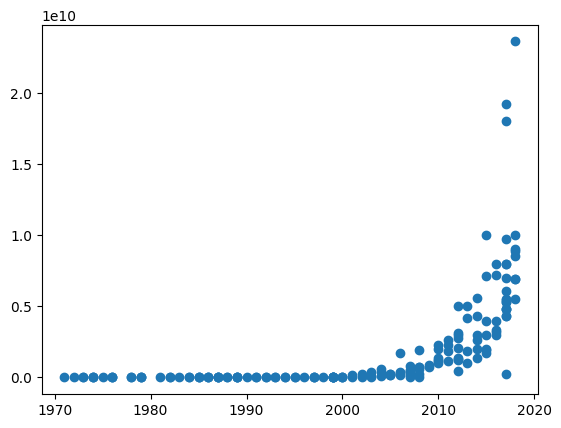

In [ ]:
# Plot the data
plt.scatter(X, Y)

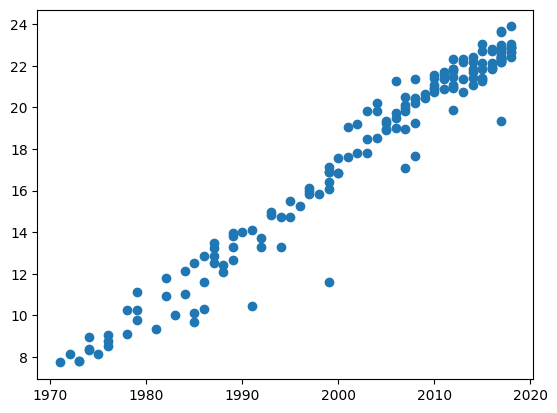

In [ ]:
# Take the log since we want to have a linear model
Y = np.log(Y)
plt.scatter(X, Y);

In [ ]:
X = X - X.mean()

In [ ]:
# Train the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),      # Specifies the shape of input (D value)
    tf.keras.layers.Dense(1)                # Output shape of 1 (there is 1 output)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.SGD(0.001, 0.9),    # used custom optimizers since data was not scaled
    loss='mse'
)

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 343.7409 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 308.6382 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 3ms/step - loss: 252.9115 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 3ms/step - loss: 195.8343 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 3ms/step - loss: 166.1351 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 120.6484 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 86.0736 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 65.3504 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 4ms/step - loss: 74.6658 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 4ms/step - loss: 88.8734 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 6

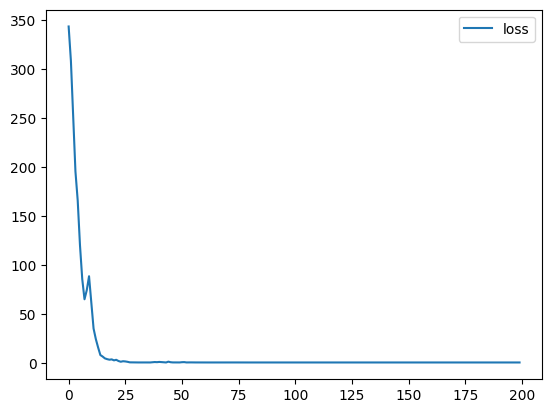

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.legend();

In [ ]:
model.layers

In [ ]:
model.layers[0].get_weights()

[array([[0.34102172]], dtype=float32), array([17.76452], dtype=float32)]

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
a

0.34102172

In [ ]:
print("Time to double", np.log(2)/a)

Time to double 2.0325602354050374


In [ ]:
# Optional

X = X.flatten()
denominator = X.dot(X) - X.mean() * X.sum()
a = ( X.dot(Y) - Y.mean() * X.sum() ) / denominator
b = ( Y.mean() * X.dot(X) - X.mean() * X.dot(Y) ) / denominator
print(a, b)

0.341682487387313 17.764939393631764


# **Part 2: Making Predictions**
This goes with the lecture "Making Predictions"

6/6 [==============================] - 0s 3ms/step


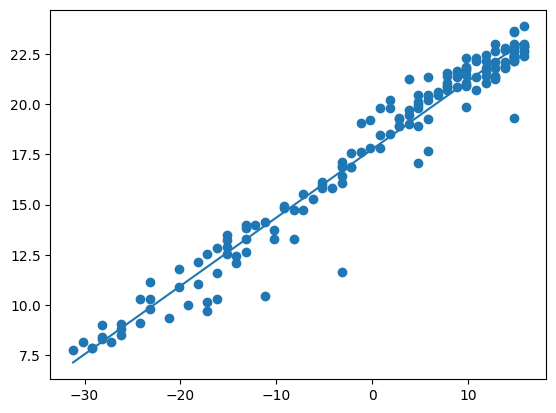

In [ ]:
# Make sure the line fits our data
Y_hat = model.predict(X).flatten()
plt.scatter(X, Y)
plt.plot(X, Y_hat)

In [ ]:
# Manual calculation

# Get the weights
w, b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier \
X = X.reshape(-1, 1)

# (N x 1) x (1 x 1) + (1) --> (N x 1)
Y_hat2 = (X.dot(w) + b).flatten()

# Don't use == for floating points
np.allclose(Y_hat, Y_hat2)

True